<a href="https://colab.research.google.com/github/KavyaChoudhary2008/class115/blob/main/class115.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import plotly.express as px
df=pd.read_csv("data.csv")
score_list=df["Score"].tolist()
accepted_list=df["Accepted"].tolist()
fig=px.scatter(x=score_list,y=accepted_list)
fig.show()

In [2]:
import numpy as np
score_array=np.array(score_list)
accepted_array=np.array(accepted_list)
#slope and intercept using the formula
m,c=np.polyfit(score_array,accepted_array,1)
y=[]
for x in score_array:
  y_value=m*x + c
  y.append(y_value)

fig=px.scatter(x=score_array,y=accepted_array)
fig.update_layout(shapes=[ dict( type= 'line', y0= min(y), y1= max(y), x0= min(score_array), x1= max(accepted_array) ) ])
fig.show()

print(m,c)

0.008277399065505892 -0.2603154737347172


logistic regression is used to handle the classfication problems which provides a discrete outputs (no/yes,true/false,o/1)
It is applied to predict the categorical dependent variable.
It is a statistical method for predicting binary classes. It is based on sigmoid function.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



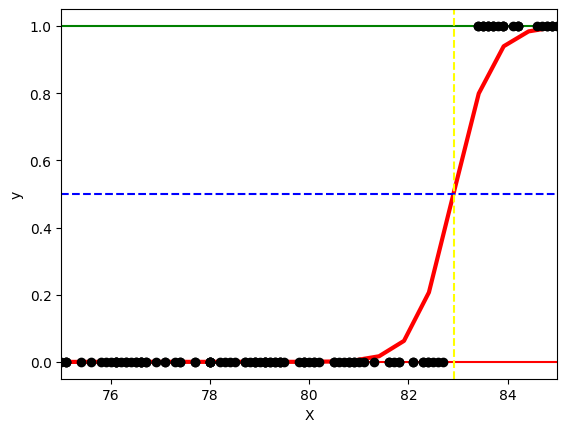

In [14]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# reshape the array without changing the data.
X = np.reshape(score_list, (len(score_list), 1))
Y = np.reshape(accepted_list, (len(accepted_list), 1))

lr = LogisticRegression()
lr.fit(X, Y)

plt.figure()
plt.scatter(X.ravel(), Y, color='black', zorder=20)

def model(x):
  return 1 / (1 + np.exp(-x))

#Using the line formula 
# linespace (start,stop,num: int)
X_test = np.linspace(0, 100, 200)
chances = model(X_test * lr.coef_ + lr.intercept_).ravel()

plt.plot(X_test, chances, color='red', linewidth=3)
plt.axhline(y=0, color='red', linestyle='-')
plt.axhline(y=1, color='green', linestyle='-')
plt.axhline(y=0.5, color='blue', linestyle='--')

# do hit and trial by changing the value of X_test
plt.axvline(x=X_test[165], color='yellow', linestyle='--')

plt.ylabel('y')
plt.xlabel('X')
plt.xlim(75, 85)
plt.show()

In [17]:
user_score = float(input("Enter your marks here:- "))
chances = model(user_score * lr.coef_ + lr.intercept_).ravel()[0]
print(chances)

if chances <= 0.01:
  print("The student will not get accepted")
elif chances >= 1:
  print("The student will get accepted!")
elif chances < 0.5:
  print("The student might not get accepted")
else:
  print("The student may get accepted")

Enter your marks here:- 35
4.1559628445495335e-57
The student will not get accepted
